In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
movies = pd.read_csv("movies.csv")

In [5]:
movies.shape

(9742, 3)

In [6]:
rating = pd.read_csv("ratings.csv")
rating.shape

(100836, 4)

In [7]:
rating['userId'].nunique()

610

In [8]:
merged = pd.merge(movies , rating , on="movieId")

In [9]:
merged['title'].unique()

array(['Toy Story (1995)', 'Jumanji (1995)', 'Grumpier Old Men (1995)',
       ..., 'Flint (2017)', 'Bungo Stray Dogs: Dead Apple (2018)',
       'Andrew Dice Clay: Dice Rules (1991)'], dtype=object)

In [10]:
merged.groupby('movieId').count().sort_values(by='rating' , ascending=False)

,title,genres,userId,rating,timestamp
movieId,,,,,
356,329,329,329,329,329
318,317,317,317,317,317
296,307,307,307,307,307
593,279,279,279,279,279
2571,278,278,278,278,278
...,...,...,...,...,...
4093,1,1,1,1,1
4089,1,1,1,1,1
58351,1,1,1,1,1


In [11]:
rating.groupby('movieId').count().sort_values(by='rating' , ascending=False)

,userId,rating,timestamp
movieId,,,
356,329,329,329
318,317,317,317
296,307,307,307
593,279,279,279
2571,278,278,278
...,...,...,...
4093,1,1,1
4089,1,1,1
58351,1,1,1


In [12]:
terminator_df = merged[merged['title'] == "Terminator 2: Judgment Day (1991)"]

In [13]:
terminator_df.describe()

,movieId,userId,rating,timestamp
count,224.0,224.000000,224.000000,2.240000e+02
mean,589.0,306.580357,3.970982,1.105281e+09
std,0.0,177.744092,0.926833,2.285163e+08
min,589.0,5.000000,0.500000,8.326953e+08
25%,589.0,163.000000,3.500000,8.537571e+08
50%,589.0,306.000000,4.000000,1.066162e+09
75%,589.0,450.500000,5.000000,1.272957e+09
max,589.0,610.000000,5.000000,1.535710e+09


In [14]:
tags = pd.read_csv("tags.csv")
tags

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


In [15]:
tags[tags['movieId'] == 2571]

,userId,movieId,tag,timestamp
815,424,2571,martial arts,1457842912
816,424,2571,sci-fi,1457842899
1646,474,2571,alternate universe,1137204991
2794,537,2571,philosophy,1424141098
2795,537,2571,post apocalyptic,1424141101


#### Q8

In [16]:
fight_club_df = merged[merged['title'] == "Fight Club (1999)"]

<Axes: xlabel='rating', ylabel='Density'>

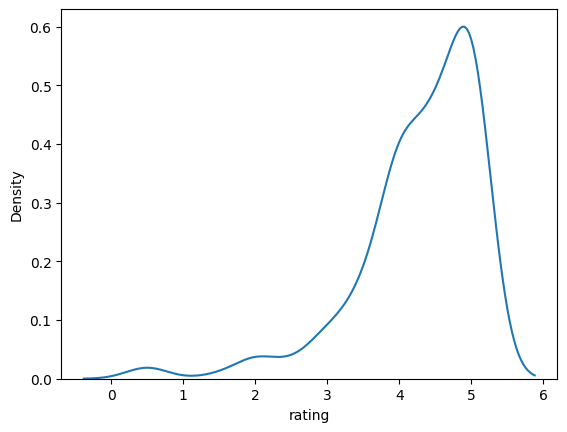

In [17]:
sns.kdeplot(fight_club_df['rating'])

# Phase 2

In [18]:
grouped_rating_movie = rating.groupby('movieId')['rating'].agg(['count' , 'mean']).reset_index()

In [19]:
grouped_rating_movie

,movieId,count,mean
0,1,215,3.920930
1,2,110,3.431818
2,3,52,3.259615
3,4,7,2.357143
4,5,49,3.071429
...,...,...,...
9719,193581,1,4.000000
9720,193583,1,3.500000
9721,193585,1,3.500000
9722,193587,1,3.500000


In [20]:
movie_rating = pd.merge(grouped_rating_movie , movies , on='movieId' , how='inner')

In [21]:
movie_rating

,movieId,count,mean,title,genres
0,1,215,3.920930,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,110,3.431818,Jumanji (1995),Adventure|Children|Fantasy
2,3,52,3.259615,Grumpier Old Men (1995),Comedy|Romance
3,4,7,2.357143,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,49,3.071429,Father of the Bride Part II (1995),Comedy
...,...,...,...,...,...
9719,193581,1,4.000000,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9720,193583,1,3.500000,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9721,193585,1,3.500000,Flint (2017),Drama
9722,193587,1,3.500000,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [22]:
filtered_df = movie_rating[movie_rating['count']>50]

In [23]:
filtered_df.sort_values(by='mean' , ascending=False)

,movieId,count,mean,title,genres
277,318,317,4.429022,"Shawshank Redemption, The (1994)",Crime|Drama
659,858,192,4.289062,"Godfather, The (1972)",Crime|Drama
2224,2959,218,4.272936,Fight Club (1999),Action|Crime|Drama|Thriller
974,1276,57,4.271930,Cool Hand Luke (1967),Drama
602,750,97,4.268041,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War
...,...,...,...,...,...
144,172,53,2.679245,Johnny Mnemonic (1995),Action|Sci-Fi|Thriller
145,173,62,2.669355,Judge Dredd (1995),Action|Crime|Sci-Fi
376,432,55,2.645455,City Slickers II: The Legend of Curly's Gold (...,Adventure|Comedy|Western
379,435,63,2.420635,Coneheads (1993),Comedy|Sci-Fi


In [24]:
filtered_df.sort_values(by='count' , ascending=False).iloc[0:5]

,movieId,count,mean,title,genres
314,356,329,4.164134,Forrest Gump (1994),Comedy|Drama|Romance|War
277,318,317,4.429022,"Shawshank Redemption, The (1994)",Crime|Drama
257,296,307,4.197068,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
510,593,279,4.161290,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
1938,2571,278,4.192446,"Matrix, The (1999)",Action|Sci-Fi|Thriller


In [25]:
scifi_movie = filtered_df[filtered_df['genres'].str.contains('Sci-Fi')]
scifi_movie

,movieId,count,mean,title,genres
31,32,177,3.983051,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
133,160,57,2.877193,Congo (1995),Action|Adventure|Mystery|Sci-Fi
144,172,53,2.679245,Johnny Mnemonic (1995),Action|Sci-Fi|Thriller
145,173,62,2.669355,Judge Dredd (1995),Action|Crime|Sci-Fi
176,208,115,2.913043,Waterworld (1995),Action|Adventure|Sci-Fi
...,...,...,...,...,...
7675,89745,69,3.869565,"Avengers, The (2012)",Action|Adventure|Sci-Fi|IMAX
7749,91500,54,3.435185,The Hunger Games (2012),Action|Adventure|Drama|Sci-Fi|Thriller
8358,109487,73,3.993151,Interstellar (2014),Sci-Fi|IMAX
8457,112852,59,4.050847,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi


In [26]:
scifi_movie.sort_values(by='count' , ascending=False).iloc[2:3]

,movieId,count,mean,title,genres
418,480,238,3.75,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller


# Phase 3

In [27]:
links = pd.read_csv('links.csv')
links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [28]:
import requests
from bs4 import BeautifulSoup
from urllib.request import urlopen


In [29]:
import requests
import numpy as np
from bs4 import BeautifulSoup

def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {'Content-Type': 'text/html; charset=UTF-8',
                        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0',
                        'Accept-Encoding': 'gzip, deflate, br'}
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text)
    imdb_rating = soup.find('span', attrs={'class' : 'cMEQkK'})
    return imdb_rating.text if imdb_rating else np.nan

In [31]:
df = links.iloc[2:9]
df

,movieId,imdbId,tmdbId
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
5,6,113277,949.0
6,7,114319,11860.0
7,8,112302,45325.0
8,9,114576,9091.0


In [36]:
links['movieId'].nunique()

9742

In [32]:
df['ratings'] = df['imdbId'].apply(scrapper)

<ipython-input-32-1a6ef3853d2f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ratings'] = df['imdbId'].apply(scrapper)


In [34]:
df

,movieId,imdbId,tmdbId,ratings
2,3,113228,15602.0,6.6
3,4,114885,31357.0,6.0
4,5,113041,11862.0,6.1
5,6,113277,949.0,8.3
6,7,114319,11860.0,6.3
7,8,112302,45325.0,5.5
8,9,114576,9091.0,5.8


In [51]:
links['rating'] = links['imdbId'].apply(scrapper)

KeyboardInterrupt: 

In [38]:
from bs4 import BeautifulSoup
import requests


In [40]:
id = str(int(113497))
n_zeroes = 7 - len(id)
new_id = "0"*n_zeroes + id
URL = f"https://www.imdb.com/title/tt{new_id}/"
request_header = {'Content-Type': 'text/html; charset=UTF-8',
                    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0',
                    'Accept-Encoding': 'gzip, deflate, br'}
response = requests.get(URL, headers=request_header)
soup = BeautifulSoup(response.text)
imdb_rating = soup.find('span', attrs={'class' : 'cMEQkK'})


In [41]:
float(imdb_rating.text)

7.1

### Web scrapping taking to much of time
#### for  this links['rating'] = links['imdbId'].apply(scrapper)

### highest imbd rating

In [ ]:
links.sort_values(by='ratings' , ascending=False).iloc[0:1]

### highest sci-fi imbd rating

In [45]:
scifi_movies = pd.merge(links , movie_rating , on = 'movieId' , how='inner')


In [ ]:
scifi_movies[scifi_movies['genres'].str.contains("Sci-Fi")].sort_values(by='ratings' , ascending=False)[0:1]